## Dog breeds

In [39]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

plt.rcParams["figure.figsize"] = (14,6)
plt.style.use('ggplot')

In [69]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [11]:
PATH = '../data/dogbreeds/'
files = !ls {PATH}train | grep jpg

## Images Size Distribution

In [32]:
shapes = np.asarray([PIL.Image.open(PATH+'train/'+f).size for f in files])
#size_d = {k: PIL.Image.open(PATH+'train/'+k).size for k in files}
#row_sz, col_sz = list(zip(*size_d.values()))
#row_sz = np.array(row_sz); col_sz = np.array(col_sz)

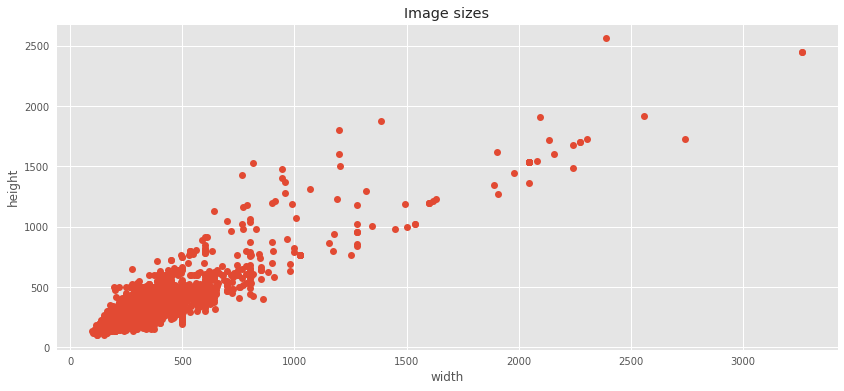

In [40]:
plt.plot(shapes[:,0], shapes[:,1], 'o')
plt.title('Image sizes')
plt.xlabel('width')
plt.ylabel('height');

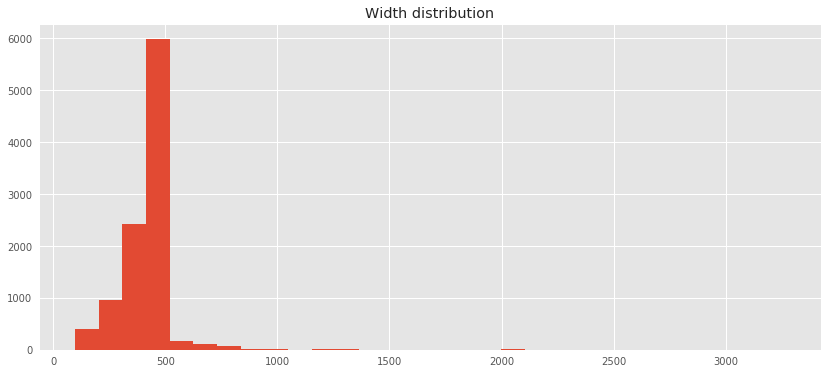

In [43]:
plt.hist(shapes[:,0], bins=30)
plt.title('Width distribution');

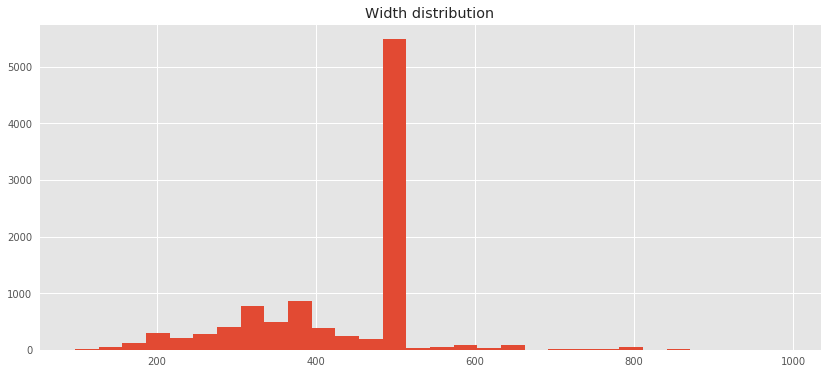

In [46]:
plt.hist(shapes[:,0][shapes[:,0] < 1000], bins=30)
plt.title('Width distribution');

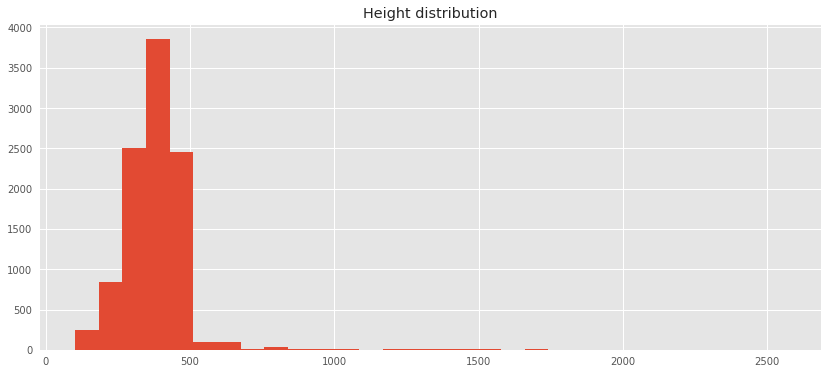

In [47]:
plt.hist(shapes[:,1], bins=30)
plt.title('Height distribution');

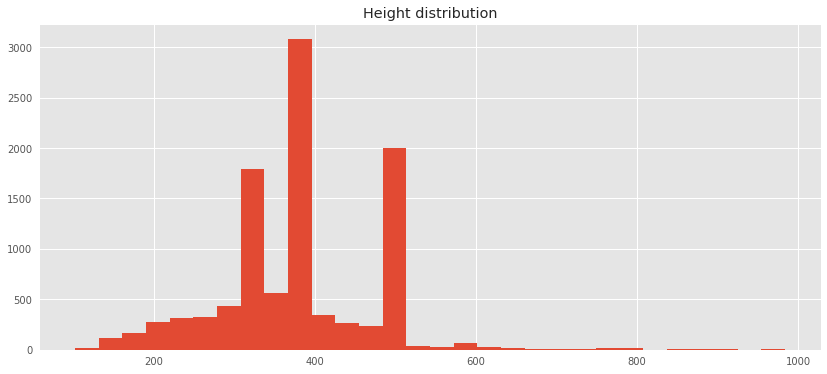

In [51]:
plt.hist(shapes[:,1][shapes[:,1] < 1000], bins=30)
plt.title('Height distribution');

In [53]:
np.mean(shapes[:, 0]), np.mean(shapes[:, 1])

(443.33153981608297, 386.74721189591077)

In [54]:
min(shapes[:, 0]), min(shapes[:, 1])

(97, 102)

In [55]:
max(shapes[:, 0]), max(shapes[:, 1])

(3264, 2562)

In [56]:
numPx = 64
numPy = 64

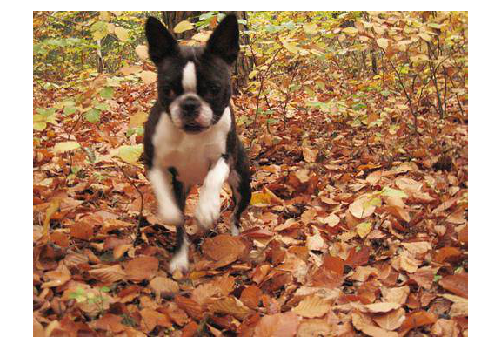

In [62]:
img = plt.imshow(PIL.Image.open(PATH+'train/'+files[0]))
plt.axis('off');

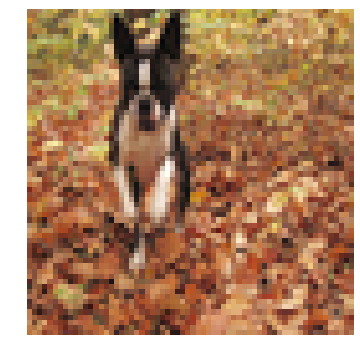

In [71]:
img = plt.imshow(PIL.Image.open(PATH+'train/'+files[0]).resize((numPx, numPy), Image.ANTIALIAS))
plt.axis('off');

## Labels

In [73]:
y = pd.read_csv(f'{PATH}labels.csv', dtype={'breed': np.str})
labels = y['breed'].unique()

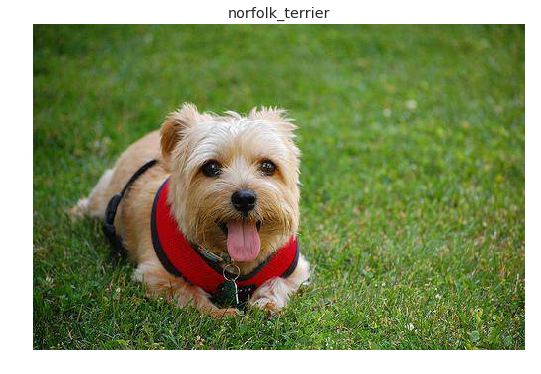

In [78]:
index = 14
label = y.iloc[index]
img = plt.imshow(PIL.Image.open(PATH+'train/'+label.id+'.jpg'))
plt.title(label.breed)
plt.axis('off');

In [83]:
lb = preprocessing.LabelBinarizer()
lb.fit(y['breed'])
lb.classes_
Y_train = np.asarray(lb.transform(y['breed']), dtype=np.float32).T
idxs = y['id']